# Performance Evaluation Metrics

In this notebook, I'll try and understand some of the performance evaluation metrics that will help in better analysing models.

### Import libraries

First, I import numerous libraries that will be required to work with the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Create dataset

To evaluate and understand various metrics, I'll create a dummy dataset which will have two features `Age` and `Experience`. Based on these features, the output labels will be `0.0` to represent salary less than `$200K` and `1.0` to represent salary more than or equal to `$200K`.

The dataset will be described as follows:
1. **Age:** Ranges from 15 Years to 60 Years
2. **Experience:** Ranges from 0 Years to 15 Years
3. **Salary:** Includes two values, `0.0` and `1.0`

There are a total of 200 values in the dataset.

The procedure of dataset creation is as follows:
1. Create 200 values in total. First 100 will have label as `0.0` and the next will have label `1.0`.
2. For label `0.0`, I will try to keep `Age` and `Experience` on the lower side and vice versa for `1.0`.

First, I create the dataset for age. I use `random.randint` to create random ages. I create two age arrays, one from 15 to 40 years for label `0.0` and the other from 30 to 60 years for label `1.0` while keeping some overlap to make data more realistic. Finally, I combine them together. 

In [2]:
high_ages = np.random.randint(30, 60, 100)
low_ages = np.random.randint(15, 40, 100)
age = np.concatenate([low_ages, high_ages])

Next, I create the dataset for experiences. I use `random.randint` to create random experience. I create two arrays, one from 0 to 9 years for label `0.0` and the other from 5 to 15 years for label `1.0` while keeping some overlap to make data more realistic. Finally, I combine them together as well.

In [3]:
high_exp = np.random.randint(5, 15, 100)
low_exp = np.random.randint(0, 9, 100)
exp = np.concatenate([low_exp, high_exp])

Finally, I combine the two columns to create `X`, the features. I also create the labels `y` using first 100 values as `0.0` and last 100 values as `1.0`.

In [4]:
X = pd.concat([pd.Series(exp), pd.Series(age)], axis = 1, names = ['Experience', 'Age'])
y = np.concatenate([np.zeros(100), np.ones(100)])

### Plot created dataset

Now, I'll use **Scatter Plot** from `matplotlib` to plot the created dataset to analyse the dataset. 

All data points with label `1.0` are marked with **GREEN** and data points with label `0.0` are marked with **RED**.

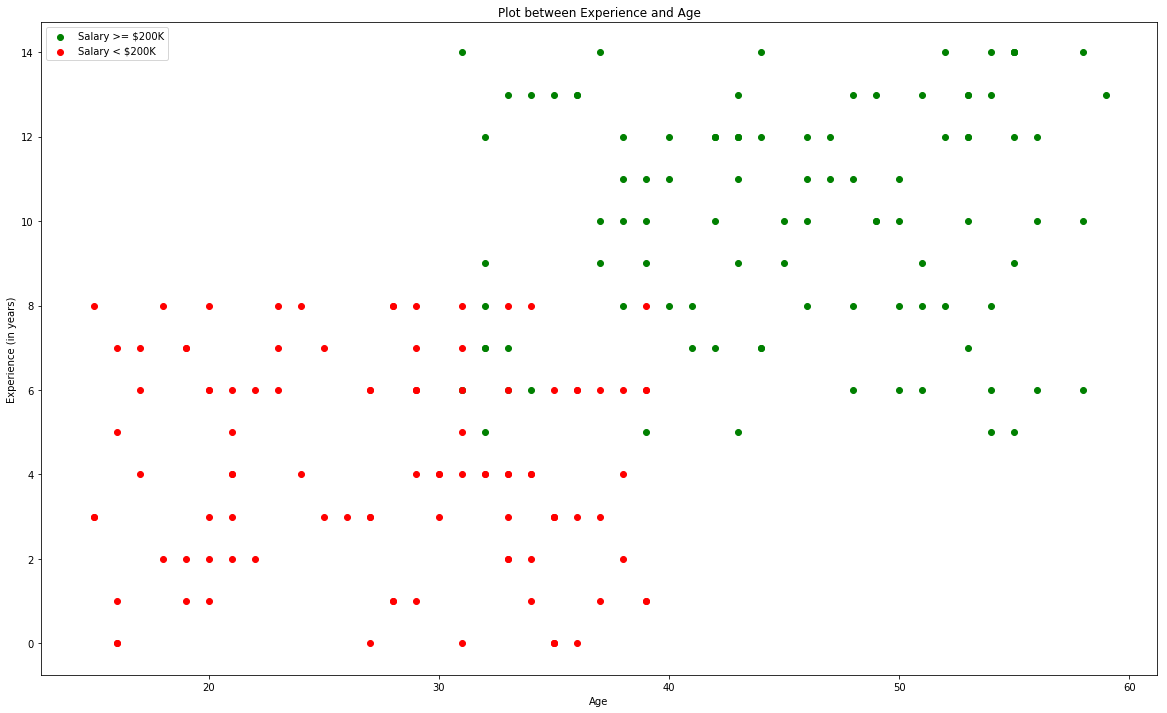

In [5]:
plt.figure(figsize = (20, 12))
plt.scatter(age[y == 1], exp[y == 1], c = 'g', label = 'Salary >= $200K')
plt.scatter(age[y == 0], exp[y == 0], c = 'r', label = 'Salary < $200K')
plt.xlabel('Age')
plt.ylabel('Experience (in years)')
plt.title('Plot between Experience and Age')
plt.legend()

The dataset appears to be good with some overlapping between **RED** and **GREEN** points. This overlap makes the data more realistic as in reality we do not usually find datasets with clearly distinct classes.

### Applying Machine Learning

A linear line might be able to separate the classes upto a great extent. So, I'll use the **Support Vector Classifier** with **lienar kernel** and then analyse its performance using key metrics.

Let's first split the dataset into **70% training data** and **30% testing data**.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Now, I will train the Support Vector Machine and store its prection inside `y_pred`.

In [7]:
from sklearn.svm import SVC

supportVectorClassifier = SVC(kernel = 'linear')
supportVectorClassifier.fit(X_train, y_train)
y_pred = supportVectorClassifier.predict(X_test)

print("Support Vector Machine score: {0:.2f}%".format(supportVectorClassifier.score(X_test, y_test)*100))

Support Vector Machine score: 90.00%


### Analysing trained model using plot

Now, I plot the results of the test data on the figure and define the decision boundary.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


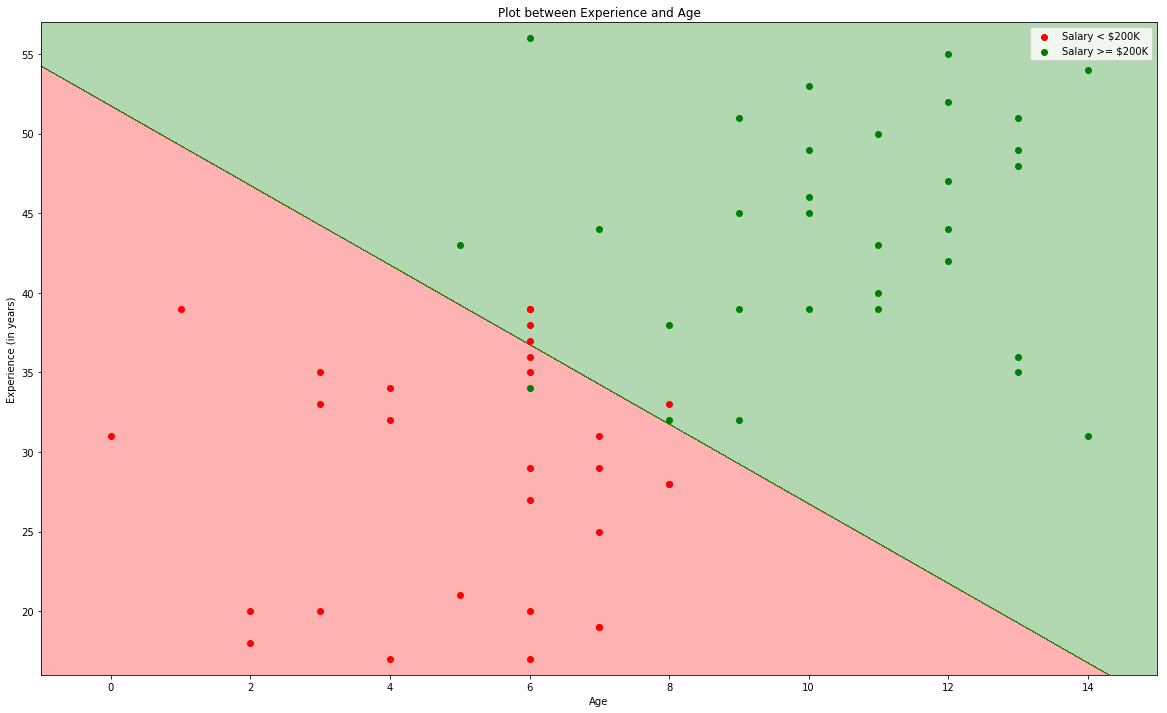

In [8]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'green'])

X_background = np.linspace(min(X_test), max(X_test), 0.01)
arr_1 = np.arange(start = X_test.iloc[:, 0].min() - 1, stop = X_test.iloc[:, 0].max() + 1, step = 0.01)
arr_2 = np.arange(start = X_test.iloc[:, 1].min() - 1, stop = X_test.iloc[:, 1].max() + 1, step = 0.01)
x_coords, y_coords = np.meshgrid(arr_1, arr_2)
plt.figure(figsize = (20, 12))
plt.contourf(x_coords, 
             y_coords, 
             supportVectorClassifier.predict(np.array([x_coords.ravel(), y_coords.ravel()]).T).reshape(x_coords.shape),
             alpha = 0.3, 
             cmap = cmap)
labels = ['Salary < $200K', 'Salary >= $200K']
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test.iloc[j == y_test, 0], X_test.iloc[j == y_test, 1],
                c = cmap(i), label = labels[i])
plt.xlabel('Age')
plt.ylabel('Experience (in years)')
plt.title('Plot between Experience and Age')
plt.legend()

The linear boundary does really well at separating the two classes in the test dataset.

However, there are still some values that were not properly classified.

### Performance Analysis

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[24,  5],
       [ 1, 30]])